In [58]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from IPython.display import clear_output

In [48]:
K=4
X,y = make_blobs(n_samples=1000, n_features=2, centers=K)

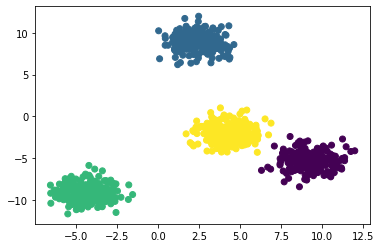

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [50]:
def init_centroids(X, K):
    rand_indexes = random.choices(range(1000), k=4)
    centroids = X[rand_indexes, :]
    return centroids

initial_centroids = init_centroids(X, K)
print(initial_centroids)

#init_centroids(X, K)    

[[-4.4063725  -9.24032958]
 [ 2.5027383   9.46354211]
 [ 9.16375915 -6.97716118]
 [ 3.28777821  9.05622807]]


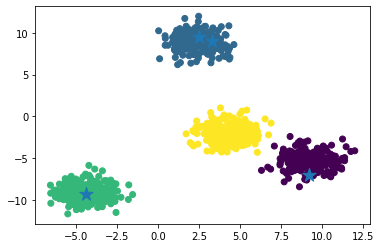

In [51]:
def visualize(X, y, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200)
    plt.show();

visualize(X, y, initial_centroids)    

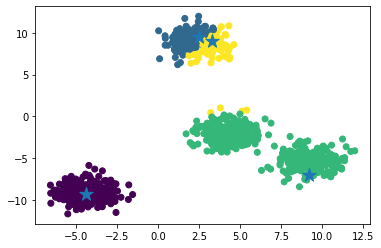

In [54]:
def assign_clusters(X, centroids):
    distance = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distance[:, i] = np.sqrt(np.sum(np.square(X - centroid), axis=1))
    y = np.argmin(distance, axis=1)
    return y

new_y = assign_clusters(X, initial_centroids)
visualize(X, new_y, initial_centroids)        

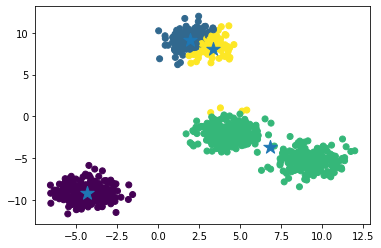

In [55]:
def recalculate_centroids(X, y, K):
    centroids = np.zeros((K, 2))
    for i in range(K):
        centroids[i, :] = np.average(X[y==i, :], axis=0)
    return centroids
new_centroids = recalculate_centroids(X, new_y, K)
visualize(X, new_y, new_centroids)    


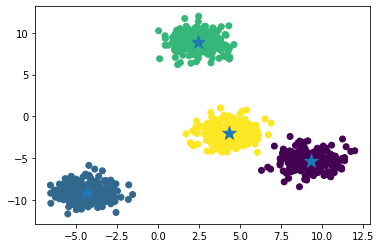

In [63]:
max_iterations = 100
centroids = init_centroids(X, K)
for i in range(max_iterations):
    
    
    print(f'Step: {i}')
    y = assign_clusters(X, centroids)
    new_centroids = recalculate_centroids(X, y, K)
    clear_output()
    visualize(X, y, centroids)
    time.sleep(1)
    
    if np.array_equal(centroids, new_centroids):
        break
    centroids = new_centroids
